clean data

In [16]:
import numpy as np
import pandas as pd

def NASDAQ_csv_input(file_name, file_path, start_train: int, end_train: int,
                     start_test: int, end_test: int):
    """
    Converts NASDAQ stock csv files to pd.dataframe with dtypes 
    [Datetime, np.float32, np.float32, np.float32, np.float32, np.int32] 
    in ascending order.
    Parameters:
    file_name: string name of full file name
    file_path: string name of full path to file
    Returns:
    pd.dataframe
    """
    # Import File
    ohlcv_data = pd.read_csv(f'{file_path}/{file_name}').iloc[::-1].reset_index(drop=True)

    # Updating Column names and order
    column_names_mapping = {'Date':'date',
                            'Close/Last':'close',
                            'Volume':'volume',
                            'Open':'open',
                            'High':'high',
                            'Low':'low'}
    desired_order = ['date','open','high','low','close','volume']
    ohlcv_data = ohlcv_data.rename(columns=column_names_mapping)[desired_order]

    # Converting to Date String to datetime datatype
    ohlcv_data['date'] = pd.to_datetime(ohlcv_data['date'], format='%m/%d/%Y')

    # Converting currency columns to float32 datatype
    columns_with_dollars = [col for col in column_names_mapping.values() if col not in ['date','volume']]
    for col in columns_with_dollars:
        ohlcv_data[col] = ohlcv_data[col].str.replace('$', '').astype(np.float32)

    # Converting 'volume' column to int32 datatype
    ohlcv_data['volume'] = ohlcv_data['volume'].astype(np.int32)

    ohlcv_data_train = ohlcv_data[start_train:end_train]
    ohlcv_data_test = ohlcv_data[start_test:end_test]


    return ohlcv_data, ohlcv_data_train, ohlcv_data_test


DQN Agent data load

In [17]:
import sys
pwd = r"C:\Users\augus\OneDrive\Desktop\rl_stock_agents"
sys.path.append(pwd)


#stock_list =["amzn_daily.csv"] # "appl_daily.csv","tsla_daily.csv","f_daily.csv","pfe_daily.csv","coke_daily.csv","brk_daily.csv","nee_daily.csv","jnj_daily.csv","pg_daily.csv"]

file_name = 'amzn_daily.csv'#,'APPL','TSLA','F','PFE','COKE','BRK','NEE','JNJ','PG']

import_path = r"C:\Users\augus\OneDrive\Desktop\rl_stock_agents\input_data"

start_train, end_train, start_test, end_test = 0, 2000, 2000, 2517

# Import File
ohlcv_data, ohlcv_data_train, ohlcv_data_test = NASDAQ_csv_input(file_name,import_path,start_train, end_train, start_test, end_test)

C:\Users\augus\AppData\Local\Temp\ipykernel_9068\3620262999.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ohlcv_data[col] = ohlcv_data[col].str.replace('$', '').astype(np.float32)


In [18]:
ohlcv_data

date        open        high         low       close    volume
0    2013-12-30   19.970501   19.996000   19.622499   19.668501  49706920
1    2013-12-31   19.729000   19.941500   19.690001   19.939501  39921780
2    2014-01-02   19.940001   19.968000   19.701000   19.898500  42756140
3    2014-01-03   19.914499   20.135500   19.811001   19.822001  44201280
4    2014-01-06   19.792500   19.850000   19.421000   19.681499  63411740
...         ...         ...         ...         ...         ...       ...
2513 2023-12-22  153.770004  154.350006  152.710007  153.419998  29514090
2514 2023-12-26  153.559998  153.975006  153.029999  153.410004  25067220
2515 2023-12-27  153.559998  154.779999  153.119995  153.339996  31434730
2516 2023-12-28  153.720001  154.080002  152.949997  153.380005  27057000
2517 2023-12-29  153.100006  153.889999  151.029999  151.940002  39823200

[2518 rows x 6 columns]

In [19]:
ohlcv_data_train

date        open        high         low       close    volume
0    2013-12-30   19.970501   19.996000   19.622499   19.668501  49706920
1    2013-12-31   19.729000   19.941500   19.690001   19.939501  39921780
2    2014-01-02   19.940001   19.968000   19.701000   19.898500  42756140
3    2014-01-03   19.914499   20.135500   19.811001   19.822001  44201280
4    2014-01-06   19.792500   19.850000   19.421000   19.681499  63411740
...         ...         ...         ...         ...         ...       ...
1995 2021-12-01  177.250000  177.994003  172.080002  172.186005  75139900
1996 2021-12-02  173.000000  174.634995  171.187500  171.867996  64725760
1997 2021-12-03  172.750000  173.493195  166.929993  169.489502  80711000
1998 2021-12-06  169.649994  173.695496  166.934494  171.368500  68860000
1999 2021-12-07  174.600006  177.499496  173.334503  176.164505  66410720

[2000 rows x 6 columns]

In [20]:
ohlcv_data_test

date        open        high         low       close    volume
2000 2021-12-08  176.150497  177.179993  174.750504  176.158005  45253660
2001 2021-12-09  175.750000  176.969498  174.139496  174.171005  46061820
2002 2021-12-10  175.417007  175.927002  170.500000  172.212006  60689760
2003 2021-12-13  172.000000  172.100006  169.130005  169.567505  62169000
2004 2021-12-14  167.550003  169.498993  166.440002  169.091507  55975280
...         ...         ...         ...         ...         ...       ...
2512 2023-12-21  153.300003  153.970001  152.100006  153.839996  36305730
2513 2023-12-22  153.770004  154.350006  152.710007  153.419998  29514090
2514 2023-12-26  153.559998  153.975006  153.029999  153.410004  25067220
2515 2023-12-27  153.559998  154.779999  153.119995  153.339996  31434730
2516 2023-12-28  153.720001  154.080002  152.949997  153.380005  27057000

[517 rows x 6 columns]

Environment

In [65]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class ContinuousOHLCVEnv(gym.Env):
    def __init__(self, ohlcv_data, initial_cash=1000):
        self.ohlcv_raw_data = ohlcv_data
        self.initial_cash = initial_cash
        self.action_space = spaces.Discrete(3)  # 0: Hold, 1: Buy, 2: Sell
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(5,))
        self.max_idx = ohlcv_data.shape[0] - 1
        self.purchase_history = [] #NEWLY ADDED TO STORE PRICE AT WHICH BOUGHT
        self.reset()

    def reset(self):
        self.current_step = 0
        self.cash_in_hand = self.initial_cash
        self.stock_holding = 0
        self.step_info = []  # Initialize an empty list to store step information
        self.stock_price = self.ohlcv_raw_data[self.current_step][3]  # Assuming closing price for stock price
        self.total_portfolio_value = self.cash_in_hand + (self.stock_holding * self.stock_price)
        self.available_actions = (0, 1)  # Can hold or buy initially
        return self.get_observation()
    
    def step(self, action):
        assert self.action_space.contains(action), f'Action {action} not in action space'
        prev_valuation = self.total_portfolio_value
        done = self.current_step >= self.max_idx ####CHECK HERE BC IN STEP_DATA EXCEL THE STEP REMAINS 1999
                                                                   #WHEN IT SHOULD STOP AT 2000, BUT CONTINUES FOR ANOTER 19 STEPS
        
        if action == 1:  # Buy
            self._buy()
        elif action == 2:  # Sell
            self._sell()

        # Update portfolio value
        self.total_portfolio_value = self.cash_in_hand + (self.stock_holding * self.stock_price)
        reward = self.total_portfolio_value - prev_valuation
        
        if not done:
            self.current_step += 1
            self.stock_price = self.ohlcv_raw_data[self.current_step][3] #TAKING END OF DAY PX FOR PORTFOLIO_VALUE CALCULATION

        step_data = {
            'Step': self.current_step,
            'Portfolio Value': np.round(self.total_portfolio_value, 2),
            'Cash': np.round(self.cash_in_hand, 2),
            'Stock Value': np.round(self.stock_price * self.stock_holding, 2), 
            'Stock Holdings': np.round(self.stock_holding, 0),
            'Stock Price': np.round(self.stock_price, 2),
            'Available Actions': self.available_actions,
            'Action': action
        }
        self.step_info.append(step_data) #WE PUTTING INTO STEP_INFO LIST THE CURRENT STEP_DATA 

        # Update available actions
        if self.stock_holding > 0 and self.cash_in_hand >= self.stock_price: #NEW ADDED CONDITION TO CHECK IF WE HAVE ENOUGH CASH TO BUY WHILE STILL HOLDING STOCKS
            self.available_actions = (0, 1, 2)
        elif self.stock_holding > 0 and self.cash_in_hand < self.stock_price:
            self.available_actions = (0, 2)  # Can hold or sell
        else:
            self.available_actions = (0, 1)  # Can hold or buy

        next_observation = self.get_observation()
        info = {'available_actions': self.available_actions}
        return next_observation, reward, done, info
    
    def _buy(self):
        self.num_stocks_buy = np.floor(self.cash_in_hand/self.stock_price)*0.5 # Buy ONLY half of the stocks
        if self.num_stocks_buy > 0 and self.stock_price * self.num_stocks_buy <= self.cash_in_hand: #NEW ADDED CONDITION TO CHECK IF WE HAVE ENOUGH CASH TO BUY
            self.cash_in_hand -= self.num_stocks_buy * self.stock_price
            self.stock_holding += self.num_stocks_buy #NEW BEFORE WE WOULD OVERWRITE ANY HELD STOCKS, ADDED += TO ADD TO EXISTING HELD STOCKS
            self.purchase_history.append((self.current_step+1, self.stock_price, self.num_stocks_buy)) #NEW, LATER ADD DATE WHEN IT WAS BOUGHT
            #self.num_stocks_buy = 0 #REMOVED FOR NOW, SEEMS REDUNDANT

    def _sell(self):
        if self.stock_holding > 0:
            total_sale_value = self.stock_holding * self.stock_price
            self.cash_in_hand += total_sale_value
            self.stock_holding = 0
            profit_or_loss = 123 #HARDCODED FOR NOW LATER WE WILL CALCULATE THIS FROM PURCHASE HISTORY (NEED TO TAKE AVG OF PREVIOUS PURCHASES AND RETURN 0 IF WE SOLD ALL, THEN AFTER WE BUY WE CALCULATE AGAIN)

    def get_observation(self):
        return self.ohlcv_raw_data[self.current_step, :].astype(np.float32)

    def get_step_data(self):
        return pd.DataFrame(self.step_info)  # Generate a DataFrame from stored 
    #step information

DQN Agent

Epochs (epoch_num): Each epoch represents a complete pass through the entire training dataset. More epochs mean the agent has more opportunities to learn from the entire dataset. Each new epoch doesn't necessarily "hold more training experience from past runs" but rather represents another chance for the agent to interact with and learn from the environment.

Steps (step_max): This is indeed the maximum number of actions (like buy/sell/stay) the agent can take in each epoch. Each step typically represents one decision-making moment in the environment.

Memory Size (memory_size): This is the capacity of the memory buffer used for experience replay. Experience replay is a method where the agent stores its experiences (state, action, reward, next state) and later samples a random batch from this memory to learn. This helps in breaking the correlation between consecutive learning samples and stabilizes the training.

Batch Size (batch_size): This refers to the number of experiences sampled from the memory for each training iteration. It's not the number of past experiences stored (that's memory_size) but the size of the subset used for each training update.

Epsilon (epsilon): Correct. An epsilon of 1 implies a completely random choice of action (exploration), while an epsilon of 0 would mean always choosing the best-known action (exploitation), based on the current policy.

Epsilon Decrease (epsilon_decrease): This is the amount by which epsilon is reduced at specified intervals (not necessarily every run or epoch but according to your implementation's logic), to slowly shift from exploration to exploitation.

Gamma (gamma): This is the discount factor for future rewards. It determines the importance given to future rewards - a lower gamma places more emphasis on immediate rewards, while a higher gamma values long-term rewards more.

show_log_freq: This parameter likely controls how often the training progress (like rewards, losses, etc.) is logged or printed out. For example, if show_log_freq is 5, the training progress might be printed every 5 epochs.

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import copy
import time
import random

class QNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_dqn(env):
    print("\t".join(["epoch", "epsilon", "total_step", "final return", "elapsed_time", "final portfolio value"])) #CHECK TOT FIN RET



    input_size = env.observation_space.shape[0]
    output_size = env.action_space.n
    hidden_size = 100

    Q = QNetwork(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    Q_ast = copy.deepcopy(Q)
    optimizer = optim.Adam(Q.parameters())

    # Training Parameters:
    # Epochs (epoch_num): The number of training cycles through the entire dataset.
    # Steps (step_max): The maximum number of steps in each epoch.
    # Memory Size (memory_size): The size of the memory buffer for experience replay.
    # Batch Size (batch_size): The number of experiences sampled from memory to train the network at each training step.
    # Epsilon (epsilon): Used for the epsilon-greedy policy to balance exploration and exploitation.
    # Epsilon Decrease (epsilon_decrease): The rate at which epsilon decreases.
    # Epsilon Minimum (epsilon_min): The minimum value epsilon can reach.
    # Gamma (gamma): The discount factor for future rewards.



    # Hyperparameters
    epoch_num = 5
    step_max = len(env.ohlcv_raw_data)-1
    memory_size = 200
    batch_size = 20
    epsilon = 1.0
    epsilon_decrease = 1e-3
    epsilon_min = 0.1
    start_reduce_epsilon = 200
    train_freq = 50
    update_q_freq = 90
    gamma = 0.97
    show_log_freq = 1

    memory = []
    total_step = 0
    total_reward = 0
    total_loss = 0
    final_returns = []

    start = time.time()
    for epoch in range(epoch_num):
        pobs = env.reset()
        step = 0
        done = False
        total_reward = 0
        total_loss = 0

        while not done and step < step_max:
            # Select action
            if np.random.rand() > epsilon:
                pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32)).unsqueeze(0)).detach()
                pact = pact.max(1)[1].item()
            else:
                pact = env.action_space.sample()

            # Act
            obs, reward, done, _ = env.step(pact)

            # Add memory
            memory.append((pobs, pact, reward, obs, done))
            if len(memory) > memory_size:
                memory.pop(0)     

            # Train or update Q
            if len(memory) == memory_size and total_step % train_freq == 0:
                mini_batch = random.sample(memory, batch_size)
                b_pobs = torch.from_numpy(np.array([item[0] for item in mini_batch], dtype=np.float32))
                b_pact = torch.from_numpy(np.array([item[1] for item in mini_batch], dtype=np.int64))
                b_reward = torch.from_numpy(np.array([item[2] for item in mini_batch], dtype=np.float32))
                b_obs = torch.from_numpy(np.array([item[3] for item in mini_batch], dtype=np.float32))
                b_done = torch.from_numpy(np.array([item[4] for item in mini_batch], dtype=bool))

                q = Q(b_pobs)
                maxq = Q_ast(b_obs).detach().max(1)[0]
                target = q.clone()
                for i in range(batch_size):
                    target[i, b_pact[i]] = b_reward[i] + gamma * maxq[i] * (not b_done[i])

                # Loss and optimize
                optimizer.zero_grad()
                loss = nn.functional.mse_loss(q, target)
                total_loss += loss.item()
                loss.backward()
                optimizer.step()

            # Update Q_ast
            if total_step % update_q_freq == 0:
                Q_ast = copy.deepcopy(Q)

            # Epsilon
            if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                epsilon -= epsilon_decrease

            # Next step
            total_reward += reward
            pobs = obs
            step += 1
            total_step += 1

        # Calculate the final portfolio value and return at the end of the epoch
        final_portfolio_value = env.get_step_data().iloc[-1]["Portfolio Value"]
        final_return = ((final_portfolio_value - 1000) / 1000) * 100
        final_returns.append(final_return)  # Store the return for this epoch

        # Logging
        #########################Adjust th statistics, not sure they are logical###
        if (epoch+1) % show_log_freq == 0:
            elapsed_time = time.time() - start
            print('\t'.join(map(str, [epoch+1, epsilon, total_step, final_return, elapsed_time, final_portfolio_value])))
            start = time.time()

    # Final metric calculation
    average_final_return = np.mean(final_returns)
    print(f'average_final_return: {average_final_return}')
    return Q, final_return, final_portfolio_value, average_final_return

train

In [79]:
env = ContinuousOHLCVEnv(ohlcv_data_train[["open","high","low",'close',"volume"]].to_numpy())  # You need to provide the ohlcv_data
Q, final_return, final_portfolio_value, average_final_return = train_dqn(env)


epoch	epsilon	total_step	final return	elapsed_time	final portfolio value
1	0.0999999999999992	1999	254.214	0.2662076950073242	3542.14
2	0.0999999999999992	3998	-13.344000000000007	0.26544904708862305	866.56
3	0.0999999999999992	5997	151.71300000000002	0.28301143646240234	2517.13
4	0.0999999999999992	7996	56.32	0.2801237106323242	1563.2
5	0.0999999999999992	9995	88.61500000000001	0.2811849117279053	1886.15
average_final_return: 107.5036


In [52]:
# After running the environment
env = ContinuousOHLCVEnv(ohlcv_data_train[["open","high","low",'close',"volume"]].to_numpy())

# Run some steps in the environment
for _ in range(env.max_idx):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

# Convert step_data to DataFrame and export
step_data_df = pd.DataFrame(env.get_step_data())
step_data_df.to_csv("step_data.csv", index=True)

# Convert purchase_history to DataFrame and export
purchase_history_df = pd.DataFrame(env.purchase_history, columns=["Step Number",'Price', 'Quantity'])
purchase_history_df.to_csv("purchase_history.csv", index=True)

In [51]:
# After taking some actions in the environment...
for _ in range(10):  # Taking 10 steps as an example
    action = env.action_space.sample()  # Randomly sampling an action
    obs, reward, done, info = env.step(action)

# Accessing step_data
step_data = env.get_step_data()
print(step_data)

# Accessing purchase_history
purchase_history = env.purchase_history
print(purchase_history)

a = pd.DataFrame(step_data)
b = pd.DataFrame(purchase_history)

a.to_csv("step_data.csv", index = True)
b.to_csv("purchase_history.csv", index = True)


      Step  Portfolio Value     Cash  Stock Value  Stock Holdings  \
0        1          1000.00   508.29       498.49            25.0   
1        2          1006.77  1006.77         0.00             0.0   
2        3          1006.77   509.31       495.55            25.0   
3        4          1004.86   509.31       492.04            25.0   
4        5          1001.35   509.31       497.54            25.0   
...    ...              ...      ...          ...             ...   
2004  1999          1285.06  1285.06         0.00             0.0   
2005  1999          1285.06   668.48       616.58             4.0   
2006  1999          1285.06   668.48       616.58             4.0   
2007  1999          1285.06  1285.06         0.00             0.0   
2008  1999          1285.06   668.48       616.58             4.0   

      Stock Price Available Actions  Action  
0           19.94            (0, 1)       1  
1           19.90         (0, 1, 2)       2  
2           19.82            (0, 

In [ ]:
"""import gym_trading_env
import gymnasium as gym
env_gym_test = gym.make('TradingEnv', df = ohlcv_data_train)
env_gym_test.unwrapped.save_for_render(dir = "render_logs")
from gym_trading_env.renderer import Renderer
renderer = Renderer(render_logs_dir="render_logs")
renderer.run()
"""

# Test

In [82]:
def test_dqn(env, model, num_episodes=100):
    """
    Test the DQN model on the environment.

    Parameters:
    env (gym.Env): The trading environment instance.
    model (QNetwork): The trained DQN model.
    num_episodes (int): Number of episodes to run the test.

    Returns:
    list: Rewards obtained in each episode.
    float: Average final portfolio value over the episodes.
    """
    total_rewards = []  # Store rewards for each episode
    final_portfolio_values = []  # Store the final portfolio value of each episode

    for episode in range(num_episodes):
        observation = env.reset()  # Reset the environment for a new episode
        done = False
        total_reward = 0

        while not done:
            # Select action based on the model's prediction
            with torch.no_grad():
                # Convert observation to tensor if it's not already
                if not isinstance(observation, torch.Tensor):
                    observation = torch.from_numpy(observation).float()
                if observation.dim() == 1:
                    observation = observation.unsqueeze(0)
                action_values = model(observation)
                action = torch.argmax(action_values, dim=1).item()

            # Take the action and observe the next state and reward
            next_observation, reward, done, _ = env.step(action)
            observation = next_observation  # Update the observation

            total_reward += reward

        total_rewards.append(total_reward)
        final_portfolio_values.append(env.get_step_data().iloc[-1]["Portfolio Value"])  # Get the final portfolio value

    average_final_portfolio_value = np.mean(final_portfolio_values)  # Calculate the average final portfolio value
    return total_rewards, average_final_portfolio_value

# Example usage:
env_test = ContinuousOHLCVEnv(ohlcv_data_test[["open", "high", "low", "close", "volume"]].to_numpy())
trained_model = Q  # Assuming Q is your trained model
test_rewards, average_portfolio_value = test_dqn(env_test, trained_model, num_episodes=100)

print(f"Average reward over {num_episodes} episodes: {np.mean(test_rewards)}")
print(f"Average final portfolio value over {num_episodes} episodes: {average_portfolio_value}")


Average reward over 100 episodes: 0.0
Average final portfolio value over 100 episodes: 1000.0


In [81]:
# Assume env and model are already defined and model is trained
num_episodes = 100
test_rewards, average_portfolio_value = test_dqn(env, model, num_episodes)

print(f"Average reward over {num_episodes} episodes: {np.mean(test_rewards)}")
print(f"Average final portfolio value over {num_episodes} episodes: {average_portfolio_value}")


NameError: name 'model' is not defined

In [ ]:
#AM NOT CONVICED ITS CORRECT NEEED TO SEE IF FOR REAL WE TESTING 500 DATA POINTS
#CHANGE THE STATISTICS, MAKE SURE THEY ARE NOT SUMMING ALL INTO ONE
#MAYBE EXPORT TO EXCEL TO SEE STEP DATA, CHECK ALL THE MEANINGS OF EPOCHS, EPISODES ETC
print(ohlcv_data_test[["open", "high", "low", 'close', "volume"]])
print(ohlcv_data_train[["open", "high", "low", 'close', "volume"]])
# Training the model
env_train = ContinuousOHLCVEnv(ohlcv_data_train[["open", "high", "low", 'close', "volume"]].to_numpy())
trained_model, _, _, _ = train_dqn(env_train)

# Testing the trained model
env_test = ContinuousOHLCVEnv(ohlcv_data_test[["open", "high", "low", 'close', "volume"]].to_numpy())
total_rewards = test_dqn(env_test, model=trained_model, num_episodes=100)


# Analyze test performance
average_reward = sum(total_rewards) / len(total_rewards)
print(f"Average reward over {len(total_rewards)} episodes: {average_reward}")


            open        high         low       close    volume
2000  176.150497  177.179993  174.750504  176.158005  45253660
2001  175.750000  176.969498  174.139496  174.171005  46061820
2002  175.417007  175.927002  170.500000  172.212006  60689760
2003  172.000000  172.100006  169.130005  169.567505  62169000
2004  167.550003  169.498993  166.440002  169.091507  55975280
...          ...         ...         ...         ...       ...
2512  153.300003  153.970001  152.100006  153.839996  36305730
2513  153.770004  154.350006  152.710007  153.419998  29514090
2514  153.559998  153.975006  153.029999  153.410004  25067220
2515  153.559998  154.779999  153.119995  153.339996  31434730
2516  153.720001  154.080002  152.949997  153.380005  27057000

[517 rows x 5 columns]
            open        high         low       close    volume
0      19.970501   19.996000   19.622499   19.668501  49706920
1      19.729000   19.941500   19.690001   19.939501  39921780
2      19.940001   19.968000   

Agent performance

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def agent_stock_performance(stock_price_ts: np.ndarray, trade_ts: np.ndarray, stock_name: str, agent_name: str):
    buy_price_idx = np.where(trade_ts == 1)[0]
    sell_price_idx = np.where(trade_ts == 2)[0]

    # Ensure the lengths of buy and sell indices are equal for comparison
    min_length = min(len(buy_price_idx), len(sell_price_idx))
    buy_price_idx = buy_price_idx[:min_length]
    sell_price_idx = sell_price_idx[:min_length]

    # Proceed with the calculations
    buy_price = stock_price_ts[buy_price_idx]
    sell_price = stock_price_ts[sell_price_idx]
    fig, ax = plt.subplots()
    ax.plot(stock_price_ts, color='grey')
    ax.scatter(buy_price_idx, buy_price, color='g', marker="^")
    ax.scatter(sell_price_idx, sell_price, color='r', marker="v")

    trade_wins = np.sum(stock_price_ts[buy_price_idx] < stock_price_ts[sell_price_idx])
    trade_loss = np.sum(stock_price_ts[buy_price_idx] > stock_price_ts[sell_price_idx])
    trade_total = min_length

    # Calculate Rate of Return (ROR) per trade
    ror_per_trade = stock_price_ts[sell_price_idx] / stock_price_ts[buy_price_idx]
    trade_return = np.prod(ror_per_trade)
    win_percentage = (trade_wins / trade_total) * 100 if trade_total > 0 else 0

    # Highlighting Buy-Sell periods
    for start, end in zip(buy_price_idx, sell_price_idx):
        color = 'grey' if stock_price_ts[start] == stock_price_ts[end] else ('g' if stock_price_ts[start] < stock_price_ts[end] else 'r')
        ax.axvspan(start, end, color=color, alpha=0.15)

    plt.title(f'{agent_name} Agent: {stock_name} Trade Performance')
    plt.ylabel(f'{stock_name} Price')
    plt.xlabel('Time Step')

    plotbox_x = 10
    plotbox_y = np.median(stock_price_ts) - (min(stock_price_ts) / 4.75)

    textbox_content = (f"Trades: {trade_total:>5}\n"
                       f"Wins: {trade_wins:>8}\n"
                       f"Loss: {trade_loss:>8}\n"
                       f"Win %: {win_percentage:.2f}\n"
                       f"ROR: {trade_return:.3f}")

    ax.text(plotbox_x, plotbox_y, textbox_content, bbox=dict(facecolor='yellow', alpha=0.5), 
            horizontalalignment='left', verticalalignment='bottom', fontsize=8)

    plt.show()

    results = {"n_trades": trade_total, 
               "n_wins": trade_wins, 
               "n_losses": trade_loss, 
               "win_percentage": win_percentage, 
               "ror": trade_return}

    return results

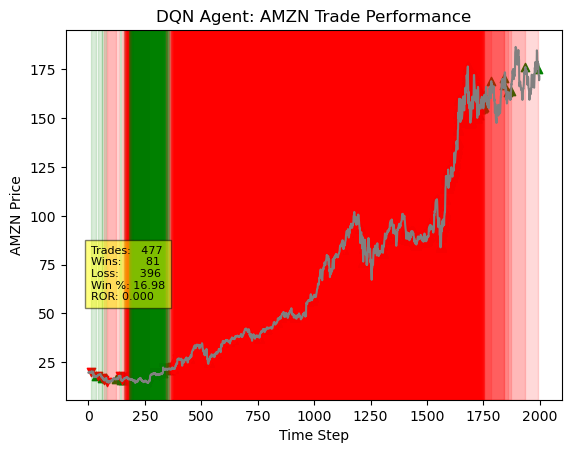

In [ ]:
# Assuming `env` is your trading environment instance after DQN run
step_data = env.get_step_data()  # Extract the DataFrame from step_info
# Extract actions and stock prices
actions_taken = step_data['Action'].to_numpy()
stock_prices = step_data['Stock Price'].to_numpy()

# Analyze performance
performance_results = agent_stock_performance(
    stock_price_ts=stock_prices,
    trade_ts=actions_taken,
    stock_name="AMZN",
    agent_name="DQN"
)

In [ ]:




###########################################################

#DQN Agent
import sys
pwd = "P:/dsv/DAMII/Practical Project/rl_stock_agents"
sys.path.append(pwd)

import cleandata
import numpy as np
from stockenv import ContinuousOHLCVEnv
import matplotlib.pyplot as plt
from agentperform import agent_stock_performance
from agents import DQNAgent
import logging



stock_list =["amzn_daily.csv"]#, "appl_daily.csv","tsla_daily.csv","f_daily.csv","pfe_daily.csv",
             #"coke_daily.csv","brk_daily.csv","nee_daily.csv","jnj_daily.csv","pg_daily.csv"]

stock_name_list = ['AMZN']#,'APPL','TSLA','F','PFE','COKE','BRK','NEE','JNJ','PG']

import_path = "P:/dsv/DAMII/Practical Project/rl_stock_agents/input_data"


# Instantiate the environment

results =[]

for file_name, stock_name in zip(stock_list,stock_name_list):
    # Import File
    
    df_ohlcv = cleandata.NASDAQ_csv_input(file_name,import_path)


    env = ContinuousOHLCVEnv(df_ohlcv[["open","high","low",'close',"volume"]].iloc[:2000].to_numpy())


    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    available_actions = env.available_actions

    # Create a DQN agent
    agent = DQNAgent(state_size, action_size,available_actions)

    batch_size = 32
    EPISODES = 50  # Number of episodes for training

    for e in range(EPISODES):
        logging.info(e)
        env.reset()
        state = env.get_observation()
        state = np.reshape(state, [1, state_size])
        print(available_actions)
        for time in range(500):  # Adjust the number of time steps per episode
            action, action_type = agent.act(state)
            next_state, reward, new_available_actions, done = env.step(action)
            logging.info(action_type)
            logging.info(env.step_info[-1])
            agent.available_actions = new_available_actions
            reward = reward if not done else -10  # Modify the reward as needed
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                print(f"episode: {e}/{EPISODES}, score: {time}, epsilon: {agent.epsilon:.2}")
                break
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)

ImportError: cannot import name 'DQNAgent' from 'agents' (c:\Users\augus\OneDrive\Desktop\rl_stock_agents\agents.py)

+++++++++++++++++++++++++++++++++


In [ ]:
#Stock performance plots
import matplotlib.pyplot as plt
import numpy as np

def agent_stock_performance(stock_price_ts: np.ndarray, trade_ts: np.ndarray,stock_name: str, agent_name:str):
    # ---------------------------------------------------------------------------------------------
    # Converts NASDAQ stock csv files from https://www.nasdaq.com/market-activity/quotes/historical
    # to pd.dataframe[date, open, high, low, close, volume] 
    # with dtypes[Datetime,np.float32, np.float32, np.float32, np.float32, np.float32, np.int)
    # in ascentding order
    #----------------------------------------------------------------------------------------------
    ## Parameters:
    #-----------------------------------------------------------------------------------------------
    #   stock_price_ts: (np.narray) 
    #       1-D array with stock's price at each timestep 
    #   trade_ts: (np.narray)
    #       1-D array with agent's action at each time step. Action defined as [-1,0,1] as
    #       [Sell, Hold, Buy] respectively.  
    #   stock_name: (str)
    #       Name of stock, for labeling of plot
    #   agent_name: (str)
    #       Name of agent, for labeling of plot
    #----------------------------------------------------------------------------------------------
    # Returns:
    #----------------------------------------------------------------------------------------------
    #   dict: dict.keys=["n_trades", "n_wins", "n_losses", "win_percentage", "ror"]
    #       dictionary with agent's trade performance:
    #           - number of trades
    #           - number of winning trades
    #           - number losing trades
    #           - trade win percentage
    #           - rate of return (product of all conducted trade returns)
    # ----------------------------------------------------------------------------------------------  

        
    # Finding index and stock price of Buy Action
    buy_price_idx = np.where(trade_ts == 'B')[0]
    buy_price_idx = buy_price_idx.astype(int)
    buy_price = stock_price_ts[buy_price_idx]

    # Finding index and stock price of Sell Action
    sell_price_idx = np.where(trade_ts == 'S')[0]
    sell_price_idx = sell_price_idx.astype(int)
    sell_price = stock_price_ts[sell_price_idx]

    # Ploting Stock Price and locations of Buy and Sell Actions
    fig, ax = plt.subplots()
    ax.plot(stock_price_ts, color='grey')
    ax.scatter(buy_price_idx,buy_price,color='g',marker="^")
    ax.scatter(sell_price_idx,sell_price,color='r',marker="v")

    # Calculating Win, Loss, Total Trades
    trade_wins = np.sum(stock_price_ts[buy_price_idx] < stock_price_ts[sell_price_idx])
    trade_loss = np.sum(stock_price_ts[buy_price_idx] > stock_price_ts[sell_price_idx])
    trade_total = int((len(buy_price_idx) + len(sell_price_idx))/2) #Function assumes trade_ts has proper buy-sell patterns 
    trade_return = np.prod(stock_price_ts[sell_price_idx] / stock_price_ts[buy_price_idx])
    win_precentage = trade_wins/trade_total*100
    
    ror_per_tradeframe = []
    assert len(buy_price_idx) == len(sell_price_idx), "Arrays should have the same length"
    buy_sell_len = len(buy_price_idx)
    for idx in range(buy_sell_len):
        sell_idx = sell_price_idx[idx]
        buy_idx = buy_price_idx[idx]
        assert buy_idx < sell_idx, "Buy time index should occur before sell time index"
        if idx > 0:
            last_buy_idx = buy_price_idx[idx - 1]
            last_sell_idx = sell_price_idx[idx - 1]
            assert sell_idx > last_buy_idx, "Sell time index should occur before last buy time index"
            assert buy_idx > last_sell_idx, "Buy time index should occur after last buy time index"        
        ror = stock_price_ts[sell_idx] / stock_price_ts[buy_idx]
        ror_per_tradeframe.append(ror)

    trade_return = np.prod(ror_per_tradeframe)
    
    hl_start = np.where(trade_ts == 'B')[0]
    hl_end = np.where(trade_ts == 'S')[0]

    for start, end in zip(hl_start, hl_end):
        color = 'grey' if stock_price_ts[start] == stock_price_ts[end] else ('g' if stock_price_ts[start] < stock_price_ts[end] else 'r')
        plt.axvspan(start, end, color=color, alpha=0.15)

    plt.title(f'{agent_name} Agent: {stock_name} Trade Performance')
    plt.ylabel(f'{stock_name} Price')
    plt.xlabel('Time Step')
    
    plotbox_x = 10
    plotbox_y = np.median(stock_price_ts) - (min(stock_price_ts)/4.75) 
        
    texbox_content = (f"Trades:{trade_total:>5}\n"
        f"Wins:{trade_wins:>8}\n"
        f"Loss: {trade_loss:>8}\n"
        f"Win %: {win_precentage:.2f}\n"
        f"ROR: {trade_return:.3f}"
    )
    ax.text(plotbox_x,
            plotbox_y,
            texbox_content, 
            bbox=dict(facecolor='yellow', alpha=0.5),
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=8)      
    plt.show()
    
    results = {"n_trades": trade_total, 
               "n_wins": trade_wins, 
               "n_losses": trade_loss, 
               "win_percentage":win_precentage, 
               "ror":trade_return}

    return results
